In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, mode

def gini(x):
    """Calcular el índice de Gini"""
    x_sorted = np.sort(x)
    n = len(x)
    index = np.arange(1, n + 1)
    gini_index = (2 * np.sum(index * x_sorted)) / (n * np.sum(x_sorted)) - (n + 1) / n
    return gini_index

def lorenz_curve(x):
    """Calcular los valores para la curva de Lorenz"""
    sorted_x = np.sort(x)
    cumulative_x = np.cumsum(sorted_x) / np.sum(sorted_x)
    cumulative_x = np.insert(cumulative_x, 0, 0)
    population = np.linspace(0, 1, len(cumulative_x))
    return population, cumulative_x

# Cargar los datos
file_path = 'country_data.csv'
data = pd.read_csv(file_path)

# Limpiar los nombres de las columnas
columns = ["GDP","SEX_RATIO",	"SURFACE_AREA","LIFE_EXPECTANCY_MALE","UNEMPLOYMENT","IMPORTS","HOMICIDE RATE","CURRENCY",
           "ISO2","EMPLOYMENT_SERVICES","EMPLOYMENT_INDUSTRY","URBAN_POPULATION_GROWTH","SECONDARY_SCHOOL_ENROLLMENT_FEMALE",
           "EMPLOYMENT_AGRICULTURE","CAPITAL","FORESTED_AREA","EXPORTS","LIFE_EXPECTANCY_FEMALE","POST_SECONDARY_ENROLLMENT_FEMALE",
           "POST_SECONDARY_ENROLLMENT_MALE","PRIMARY_SCHOOL_ENROLLMENT_FEMALE","INFANT_MORTALITY","GDP_GROWTH","THREATENED_SPECIES",
           "POPULATION","URBAN_POPULATION","SECONDARY_SCHOOL_ENROLLMENT_MALE","NAME","POP_GROWTH","REGION","POP_DENSITY",
           "INTERNET_USER","GDP_PER_CAPITA","FERTILITY","REFUGEES","PRIMARY_SCHOOL_ENROLLMENT_MALE","CO2_EMISSIONS","TOURISTS"]
data.columns = columns

# Eliminar valores nulos en columnas relevantes
data_clean = data.dropna(subset=["GDP","SEX_RATIO",	"SURFACE_AREA","LIFE_EXPECTANCY_MALE","UNEMPLOYMENT","IMPORTS","HOMICIDE RATE",
           "EMPLOYMENT_SERVICES","EMPLOYMENT_INDUSTRY","URBAN_POPULATION_GROWTH","SECONDARY_SCHOOL_ENROLLMENT_FEMALE",
           "EMPLOYMENT_AGRICULTURE","FORESTED_AREA","EXPORTS","LIFE_EXPECTANCY_FEMALE","POST_SECONDARY_ENROLLMENT_FEMALE",
           "POST_SECONDARY_ENROLLMENT_MALE","PRIMARY_SCHOOL_ENROLLMENT_FEMALE","INFANT_MORTALITY","GDP_GROWTH","THREATENED_SPECIES",
           "POPULATION","URBAN_POPULATION","SECONDARY_SCHOOL_ENROLLMENT_MALE","POP_GROWTH","POP_DENSITY",
           "INTERNET_USER","GDP_PER_CAPITA","FERTILITY","REFUGEES","PRIMARY_SCHOOL_ENROLLMENT_MALE","CO2_EMISSIONS","TOURISTS"])

# Función para hacer análisis univariado por variable
def univariate_analysis(df, variable):
    print(f"\nAnálisis Univariado para {variable}\n{'-'*50}")

    # Medidas de tendencia central
    mean_val = df[variable].mean()
    median_val = df[variable].median()
    #mode_val = mode(df[variable]).mode[0]

    print(f"Media: {mean_val:.2f}")
    print(f"Mediana: {median_val:.2f}")
    #print(f"Moda: {mode_val:.2f}")

    # Medidas de dispersión
    std_val = df[variable].std()
    var_val = df[variable].var()
    range_val = df[variable].max() - df[variable].min()
    cv_val = (std_val / mean_val) * 100
    iqr_val = np.percentile(df[variable], 75) - np.percentile(df[variable], 25)  # Rango intercuartil

    print(f"Desviación estándar: {std_val:.2f}")
    print(f"Varianza: {var_val:.2f}")
    print(f"Rango: {range_val:.2f}")
    print(f"Coeficiente de variación: {cv_val:.2f}%")
    print(f"Rango intercuartil (IQR): {iqr_val:.2f}")

    # Cuartiles, deciles, percentiles
    quartiles = np.percentile(df[variable], [25, 50, 75])
    deciles = np.percentile(df[variable], np.arange(10, 100, 10))
    percentiles = np.percentile(df[variable], np.arange(1, 100, 1))

    print(f"Cuartiles: {quartiles}")
    print(f"Deciles: {deciles}")
    print(f"Percentiles: {percentiles}")

    # Medidas de asimetría y curtosis
    skewness_val = skew(df[variable])
    kurtosis_val = kurtosis(df[variable])

    print(f"Asimetría (Skewness): {skewness_val:.2f}")
    print(f"Curtosis: {kurtosis_val:.2f}")

    # Medidas de desigualdad: Índice de Gini
    gini_val = gini(df[variable])
    print(f"Índice de Gini: {gini_val:.2f}")

    # Visualizaciones: Histograma, Boxplot, Densidad
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], kde=True)
    plt.title(f'Histograma de {variable}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[variable])
    plt.title(f'Boxplot de {variable}')

    plt.subplot(1, 3, 3)
    sns.kdeplot(df[variable], fill=True)
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Media = {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Mediana = {median_val:.2f}')
    plt.title(f'Densidad de {variable} con Media y Mediana')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Curva de Lorenz
    population, cumulative_income = lorenz_curve(df[variable])

    plt.figure(figsize=(6, 6))
    plt.plot(population, cumulative_income, label=f'Lorenz de {variable}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'Curva de Lorenz: {variable}')
    plt.xlabel('Proporción de la Población')
    plt.ylabel('Proporción Acumulada de Ingresos')
    plt.legend()
    plt.grid(True)
    plt.show()

# Análisis de variables categóricas
def categorical_analysis(df, variable):
    print(f"\nAnálisis Categórico para {variable}\n{'-'*50}")

    # Tabla de frecuencia
    freq_table = df[variable].value_counts()
    rel_freq = df[variable].value_counts(normalize=True)
    cumulative_freq = freq_table.cumsum()
    cumulative_rel_freq = rel_freq.cumsum()

    freq_df = pd.DataFrame({
        'Frecuencia Absoluta': freq_table,
        'Frecuencia Relativa': rel_freq,
        'Frecuencia Absoluta Acumulada': cumulative_freq,
        'Frecuencia Relativa Acumulada': cumulative_rel_freq
    })

    print(freq_df)

    # Diagrama de barras
    plt.figure(figsize=(8, 6))
    sns.barplot(x=freq_table.index, y=freq_table.values, palette="Blues_d")
    plt.title(f'Diagrama de Barras: {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()



In [32]:
data_clean

,GDP,SEX_RATIO,SURFACE_AREA,LIFE_EXPECTANCY_MALE,UNEMPLOYMENT,IMPORTS,HOMICIDE RATE,CURRENCY,ISO2,EMPLOYMENT_SERVICES,...,POP_GROWTH,REGION,POP_DENSITY,INTERNET_USER,GDP_PER_CAPITA,FERTILITY,REFUGEES,PRIMARY_SCHOOL_ENROLLMENT_MALE,CO2_EMISSIONS,TOURISTS
1,15059.0,103.7,28748.0,76.7,12.8,5908.0,2.3,"{'code': 'ALL', 'name': 'Lek'}",AL,43.7,...,-0.1,Southern Europe,105.0,71.8,5223.8,1.6,4.3,105.2,4.3,5340.0
2,173757.0,102.1,2381741.0,75.4,11.5,45140.0,1.4,"{'code': 'DZD', 'name': 'Algerian Dinar'}",DZ,59.6,...,2.0,Northern Africa,18.4,49.0,4114.7,3.0,99.5,112.4,130.5,2657.0
4,105902.0,97.9,1246700.0,57.8,6.8,21340.0,4.8,"{'code': 'AOA', 'name': 'Kwanza'}",AO,41.7,...,3.3,Middle Africa,26.4,14.3,3437.3,5.6,70.1,121.1,18.0,218.0
6,518475.0,95.3,2780400.0,73.0,10.4,49125.0,5.3,"{'code': 'ARS', 'name': 'Argentine Peso'}",AR,78.9,...,1.0,South America,16.5,74.3,11687.6,2.3,165.6,109.9,183.4,6942.0
7,12433.0,88.8,29743.0,71.1,16.6,5053.0,1.7,"{'code': 'AMD', 'name': 'Armenian Dram'}",AM,53.6,...,0.3,Western Asia,104.1,64.7,4212.1,1.8,19.0,92.7,5.2,1652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,59597.0,93.5,173626.0,73.9,8.8,8226.0,12.1,"{'code': 'UYU', 'name': 'Peso Uruguayo'}",UY,73.4,...,0.4,South America,19.8,74.8,17278.1,2.0,21.5,109.3,5.9,3469.0
196,50500.0,99.6,448969.0,69.4,6.1,21867.0,1.1,"{'code': 'UZS', 'name': 'Uzbekistan Sum'}",UZ,46.8,...,1.6,Central Asia,78.7,55.2,1555.0,2.4,95.9,105.0,81.2,5346.0
199,208338.0,96.8,912050.0,68.4,9.4,1051.0,36.7,"{'code': 'VEF', 'name': 'Bolavar'}",VE,75.5,...,-1.1,South America,32.2,72.0,7212.2,2.3,452.6,98.3,113.7,427.0
201,26672.0,101.5,527968.0,64.4,12.8,4716.0,6.8,"{'code': 'YER', 'name': 'Yemeni Rial'}",YE,61.4,...,2.4,Western Asia,56.5,26.7,935.9,3.8,3922.9,99.9,8.9,367.0



Análisis Univariado para GDP
--------------------------------------------------
Media: 675610.20
Mediana: 105929.00
Desviación estándar: 2285355.42
Varianza: 5222849378475.09
Rango: 20574716.00
Coeficiente de variación: 338.27%
Rango intercuartil (IQR): 344364.00
Cuartiles: [ 35288.5 105929.  379652.5]
Deciles: [  14565.8   25146.8   43643.4   65800.6  105929.   210698.4  330705.4
  515778.4 1453871. ]
Percentiles: [7.64270000e+03 9.06698000e+03 1.09771100e+04 1.22531600e+04
 1.24428000e+04 1.26789200e+04 1.29098300e+04 1.33887600e+04
 1.44142800e+04 1.45658000e+04 1.48230200e+04 1.50590000e+04
 1.55371500e+04 1.65731600e+04 1.77522500e+04 2.04848400e+04
 2.39007700e+04 2.42367600e+04 2.45694000e+04 2.51468000e+04
 2.59537500e+04 2.64383000e+04 2.76331400e+04 3.08941600e+04
 3.52885000e+04 3.82522800e+04 3.94986700e+04 4.02575600e+04
 4.08823800e+04 4.36434000e+04 4.87551100e+04 5.05698400e+04
 5.32549400e+04 5.44695400e+04 5.80032000e+04 5.96334000e+04
 6.00192800e+04 6.09737000e+04 

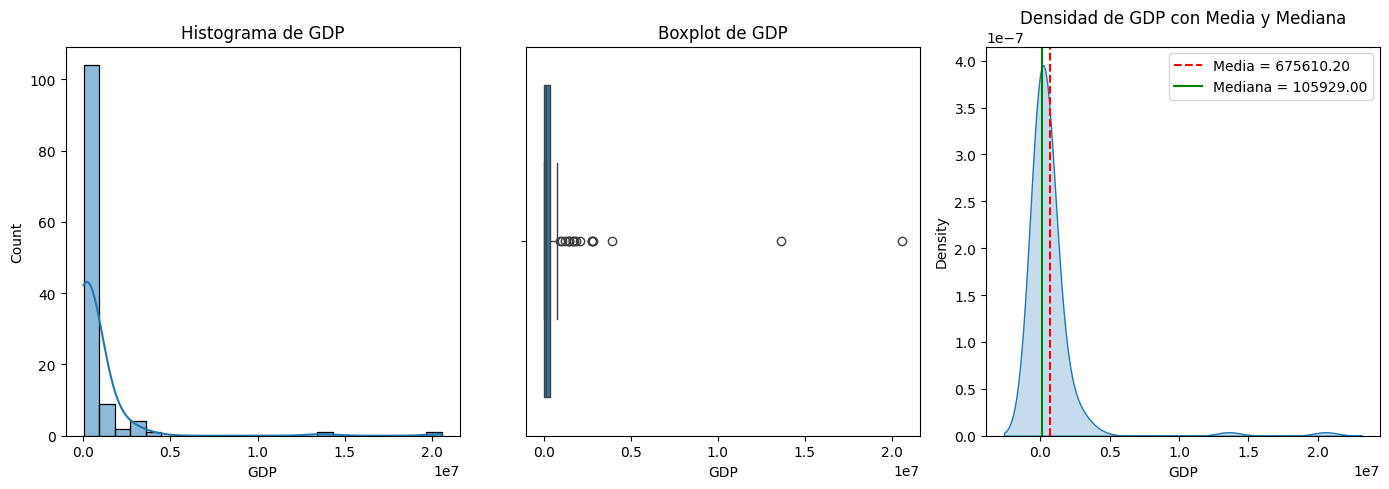

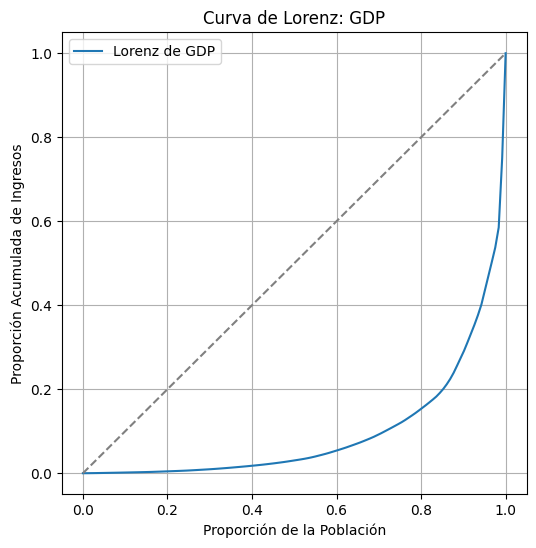

In [33]:

# Análisis univariado para SALARY_IN_USD
univariate_analysis(data_clean, 'GDP')


Análisis Univariado para SEX_RATIO
--------------------------------------------------
Media: 101.55
Mediana: 98.50
Desviación estándar: 23.19
Varianza: 537.91
Rango: 217.90
Coeficiente de variación: 22.84%
Rango intercuartil (IQR): 5.30
Cuartiles: [ 95.3  98.5 100.6]
Deciles: [ 91.1  94.4  96.4  97.2  98.5  99.2 100.1 101.6 103.7]
Percentiles: [ 85.64  86.24  86.36  86.96  88.    88.8   89.2   89.92  90.64  91.1
  91.42  91.98  92.64  93.08  93.5   93.8   93.84  93.96  94.24  94.4
  94.52  94.68  94.86  94.9   95.3   95.3   95.34  95.64  95.96  96.4
  96.52  96.6   96.66  96.78  97.    97.02  97.1   97.1   97.18  97.2
  97.3   97.46  97.76  97.8   97.9   97.9   97.9   98.14  98.38  98.5
  98.5   98.5   98.56  98.6   98.7   98.82  98.98  99.16  99.2   99.2
  99.36  99.68  99.8   99.8   99.8   99.9   99.9  100.02 100.1  100.1
 100.12 100.2  100.2  100.36 100.6  100.9  100.98 101.28 101.48 101.6
 102.02 102.1  102.1  102.18 102.3  102.52 102.68 102.8  103.2  103.7
 104.02 105.46 105.88 1

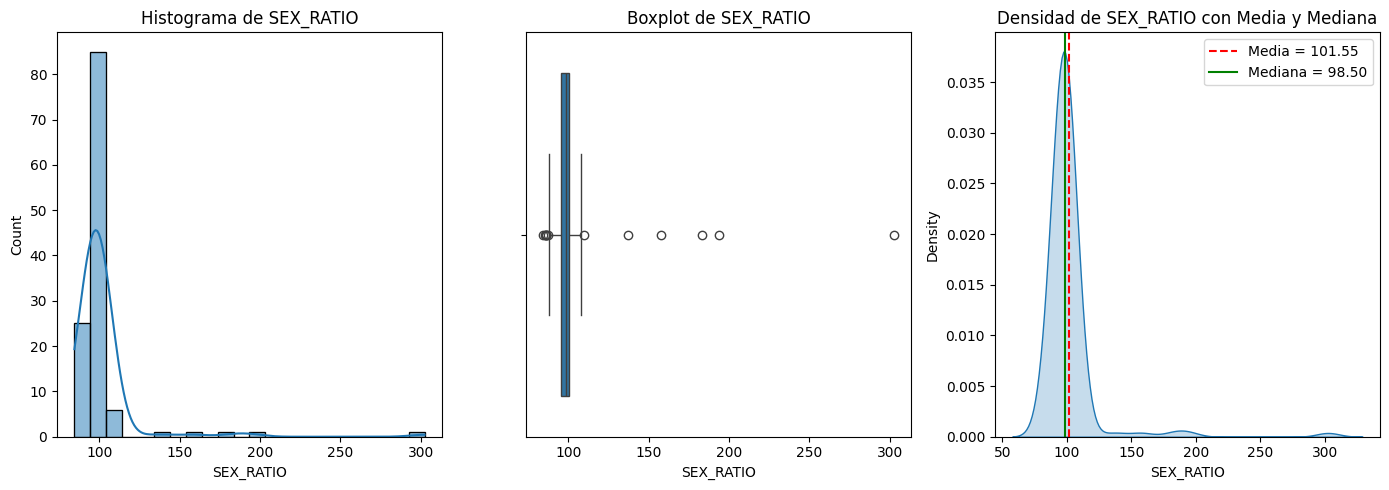

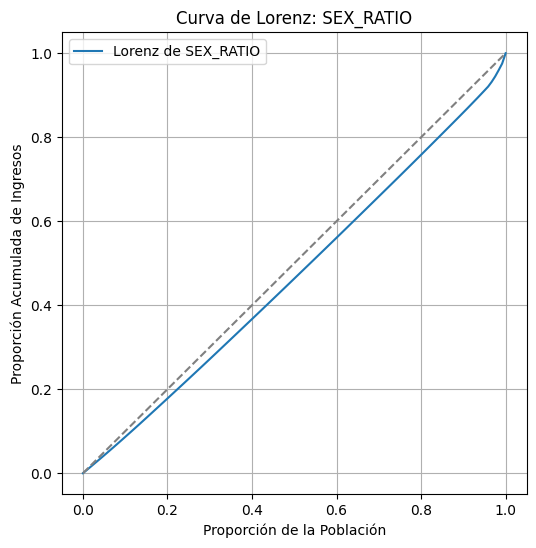

In [24]:

# Análisis univariado para SALARY_IN_USD
univariate_analysis(data_clean, 'SEX_RATIO')


Análisis Univariado para LIFE_EXPECTANCY_FEMALE
--------------------------------------------------
Media: 77.55
Mediana: 78.50
Desviación estándar: 6.45
Varianza: 41.64
Rango: 30.90
Coeficiente de variación: 8.32%
Rango intercuartil (IQR): 7.20
Cuartiles: [75.3 78.5 82.5]
Deciles: [67.9 73.6 76.2 77.6 78.5 79.8 81.4 83.7 84.4]
Percentiles: [60.44 62.44 62.8  62.96 63.4  63.66 65.46 66.9  67.58 67.9  68.1  68.86
 69.64 70.36 71.5  71.54 71.78 72.2  72.88 73.6  73.64 73.92 74.1  75.06
 75.3  75.5  75.9  76.02 76.1  76.2  76.42 76.54 76.72 76.88 77.1  77.32
 77.44 77.5  77.5  77.6  77.62 77.74 77.8  77.8  77.9  78.12 78.24 78.3
 78.38 78.5  78.6  79.04 79.16 79.28 79.3  79.36 79.68 79.8  79.8  79.8
 80.   80.04 80.1  80.1  80.6  80.72 80.92 81.22 81.3  81.4  81.56 81.8
 82.1  82.38 82.5  82.7  82.74 82.86 83.46 83.7  83.72 83.8  83.8  83.8
 83.8  84.12 84.2  84.26 84.3  84.4  84.5  84.54 84.96 85.2  85.4  85.4
 85.4  85.46 85.66]
Asimetría (Skewness): -1.10
Curtosis: 0.89
Índice de Gini:

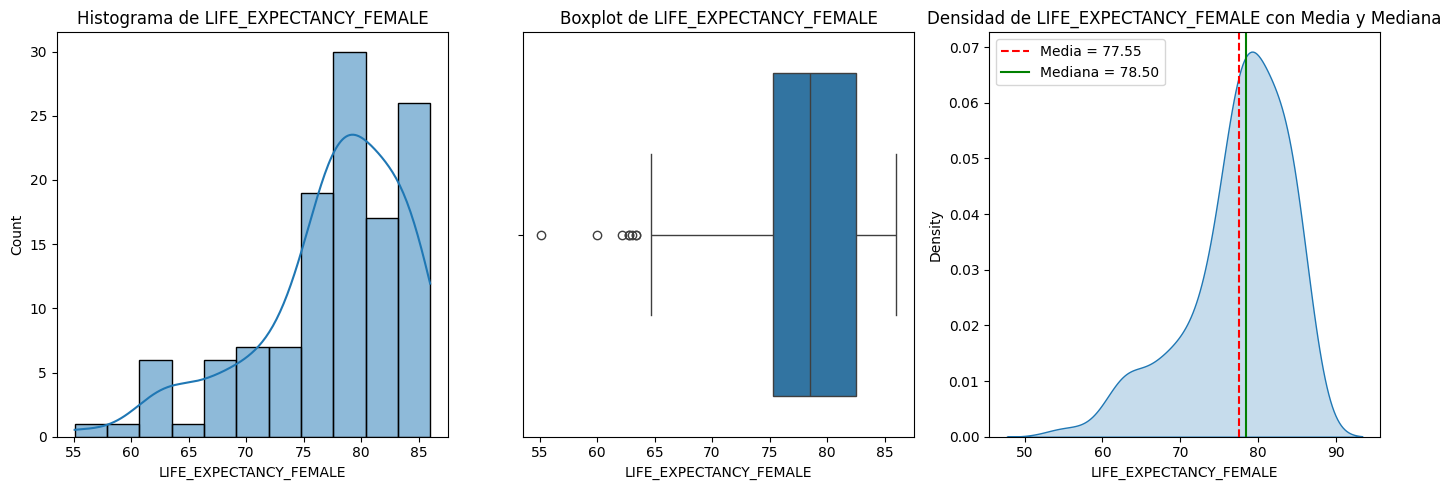

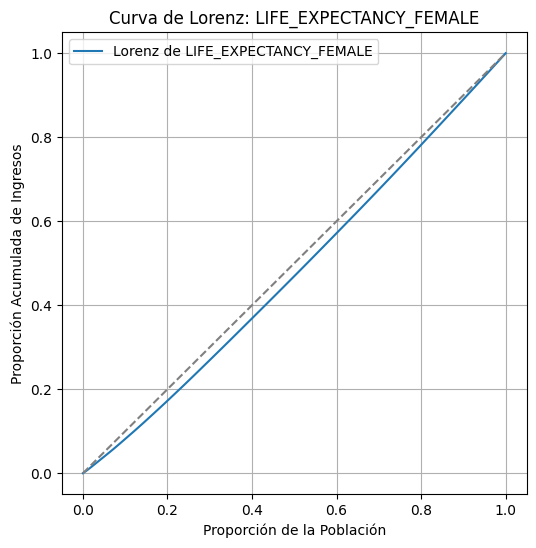


Análisis Univariado para LIFE_EXPECTANCY_MALE
--------------------------------------------------
Media: 72.36
Mediana: 73.30
Desviación estándar: 6.41
Varianza: 41.14
Rango: 28.30
Coeficiente de variación: 8.86%
Rango intercuartil (IQR): 9.00
Cuartiles: [68.4 73.3 77.4]
Deciles: [63.8 67.2 69.3 71.9 73.3 74.5 76.3 78.8 80.3]
Percentiles: [57.1  57.62 57.8  58.92 59.8  60.3  61.46 62.84 63.56 63.8  64.16 64.44
 64.98 65.46 65.9  66.02 66.38 66.8  67.04 67.2  67.24 67.68 68.1  68.26
 68.4  68.64 68.8  68.98 69.26 69.3  69.42 69.66 69.96 70.24 70.5  70.76
 71.04 71.1  71.26 71.9  72.1  72.22 72.58 72.7  72.8  73.   73.   73.06
 73.18 73.3  73.62 73.7  73.7  73.86 74.   74.   74.08 74.2  74.36 74.5
 74.5  74.54 74.84 75.08 75.1  75.32 75.4  75.64 76.12 76.3  76.54 76.7
 76.7  77.26 77.4  78.28 78.64 78.7  78.7  78.8  78.9  78.9  78.96 79.32
 79.4  79.42 79.54 79.72 80.12 80.3  80.32 80.4  80.52 80.76 81.   81.04
 81.2  81.2  81.2 ]
Asimetría (Skewness): -0.66
Curtosis: -0.08
Índice de Gin

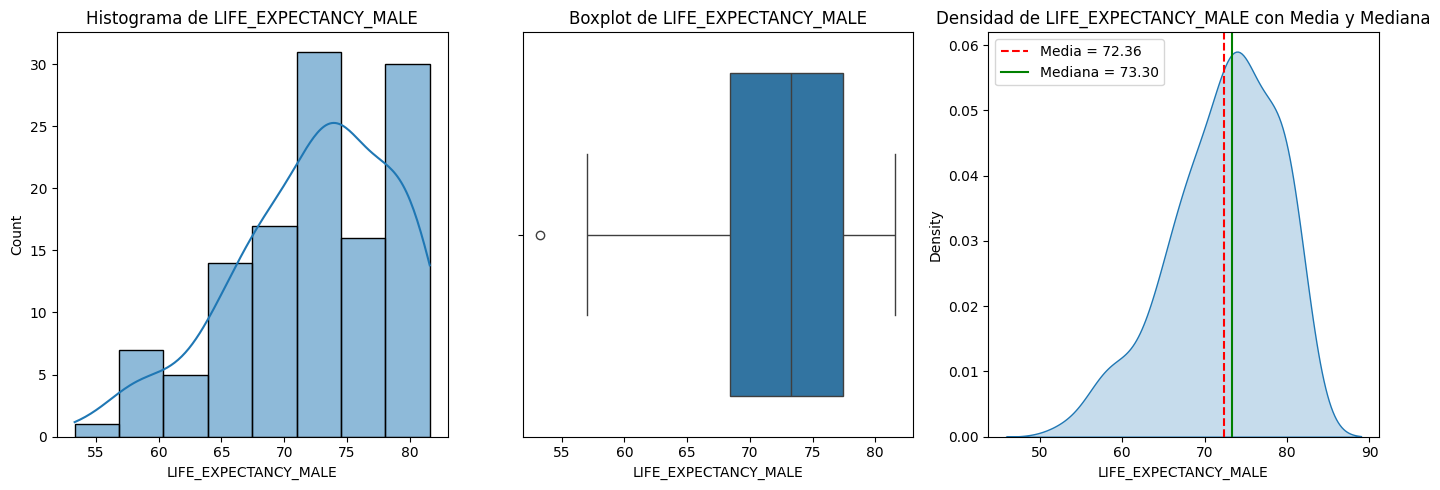

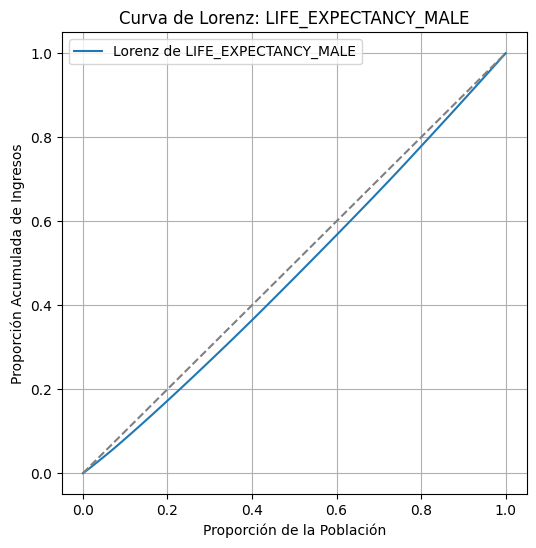

In [9]:

# Análisis univariado para SALARY_IN_USD
univariate_analysis(data_clean, 'LIFE_EXPECTANCY_FEMALE')
univariate_analysis(data_clean, 'LIFE_EXPECTANCY_MALE')


Análisis Univariado para PRIMARY_SCHOOL_ENROLLMENT_MALE
--------------------------------------------------
Media: 102.98
Mediana: 102.70
Desviación estándar: 9.03
Varianza: 81.54
Rango: 64.90
Coeficiente de variación: 8.77%
Rango intercuartil (IQR): 6.30
Cuartiles: [ 99.5 102.7 105.8]
Deciles: [ 92.7  98.6 100.  101.1 102.7 103.9 105.2 108.7 112.8]
Percentiles: [ 80.52  82.56  84.66  86.9   88.1   89.28  90.    91.2   92.48  92.7
  93.    93.96  95.94  96.38  97.2   97.36  98.04  98.16  98.28  98.6
  99.04  99.24  99.3   99.46  99.5   99.72  99.8   99.86  99.98 100.
 100.22 100.3  100.3  100.38 100.4  100.44 100.64 100.7  100.94 101.1
 101.14 101.34 101.52 101.84 102.   102.2  102.28 102.52 102.6  102.7
 102.8  102.8  102.86 102.98 103.2  103.2  103.24 103.36 103.48 103.9
 103.9  103.98 104.1  104.18 104.4  104.44 104.72 104.96 105.16 105.2
 105.34 105.5  105.56 105.68 105.8  106.42 107.78 107.9  108.06 108.7
 108.72 108.8  109.1  109.38 109.9  110.14 111.62 112.4  112.4  112.8
 115.0

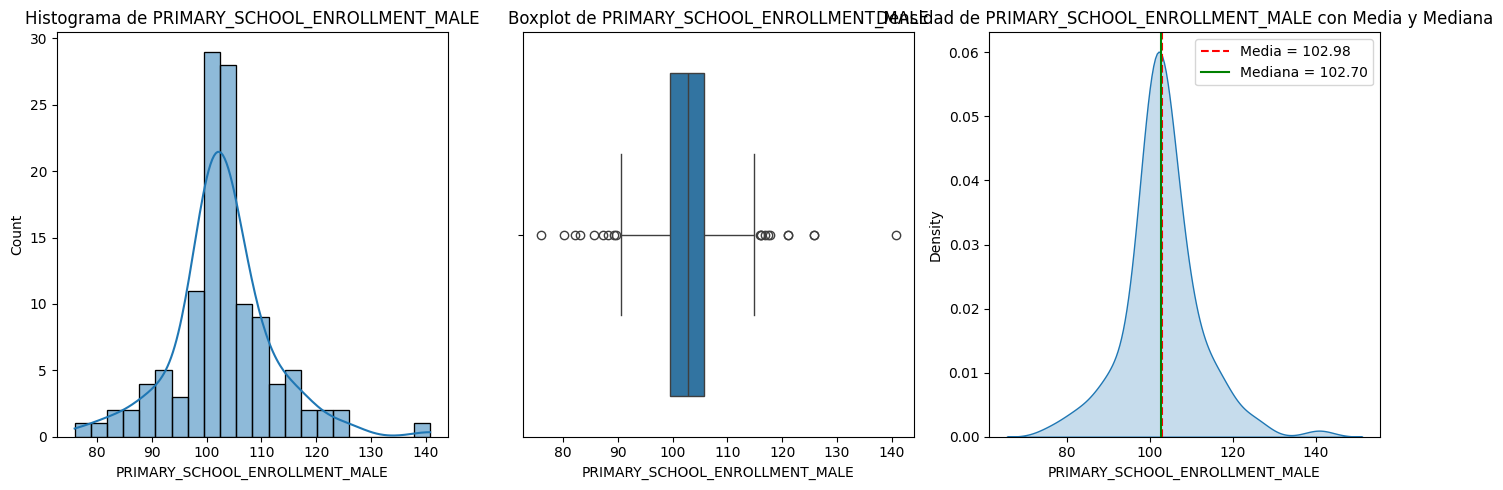

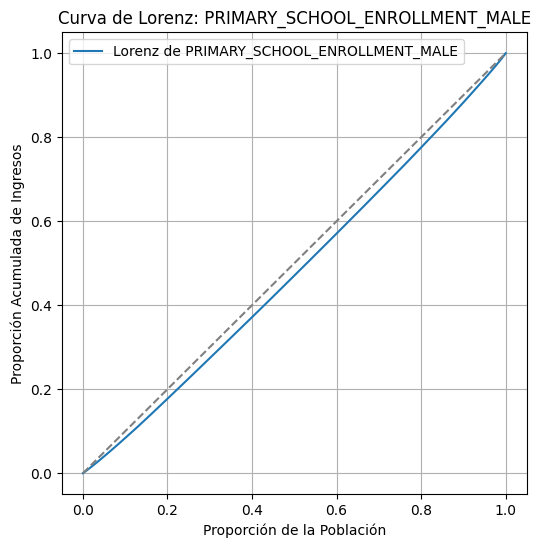

In [25]:
univariate_analysis(data_clean, 'PRIMARY_SCHOOL_ENROLLMENT_MALE')


Análisis Univariado para UNEMPLOYMENT
--------------------------------------------------
Media: 6.70
Mediana: 5.30
Desviación estándar: 4.56
Varianza: 20.81
Rango: 28.40
Coeficiente de variación: 68.13%
Rango intercuartil (IQR): 5.10
Cuartiles: [3.8 5.3 8.9]
Deciles: [ 2.2  3.4  4.1  4.6  5.3  6.1  8.  10.1 12.8]
Percentiles: [ 0.54  0.74  0.8   1.36  1.6   1.74  1.94  2.    2.08  2.2   2.34  2.54
  2.6   2.92  3.    3.04  3.2   3.2   3.36  3.4   3.42  3.54  3.72  3.8
  3.8   3.82  3.9   3.96  4.08  4.1   4.2   4.2   4.2   4.36  4.4   4.4
  4.44  4.56  4.6   4.6   4.8   4.8   4.8   4.8   4.8   5.02  5.14  5.2
  5.2   5.3   5.32  5.4   5.4   5.4   5.7   5.9   5.9   5.96  6.    6.1
  6.34  6.54  6.66  6.7   6.7   6.8   6.92  7.1   7.18  8.    8.06  8.3
  8.36  8.72  8.9   9.    9.16  9.58  9.78 10.1  10.4  10.64 11.12 11.44
 11.5  12.14 12.7  12.76 12.8  12.8  12.84 13.64 14.66 14.78 15.5  16.24
 16.48 16.6  18.28]
Asimetría (Skewness): 1.52
Curtosis: 3.40
Índice de Gini: 0.35


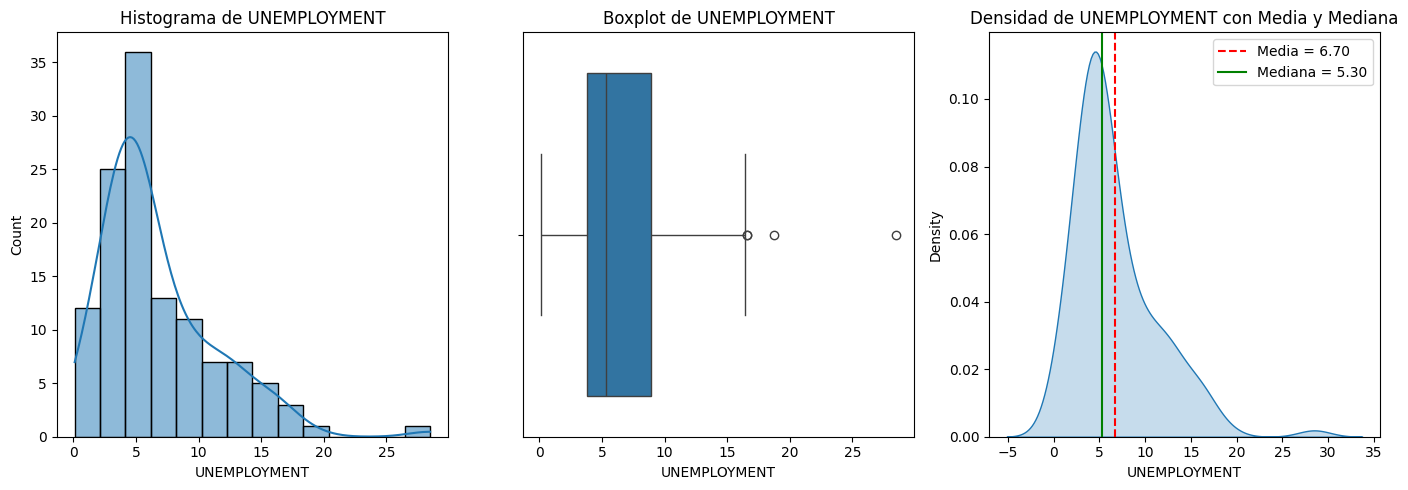

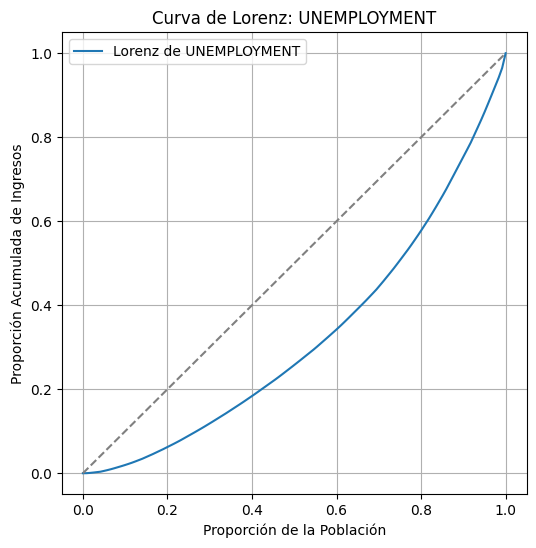

In [10]:
univariate_analysis(data_clean, 'UNEMPLOYMENT')


Análisis Univariado para CO2_EMISSIONS
--------------------------------------------------
Media: 248.62
Mediana: 37.60
Desviación estándar: 966.02
Varianza: 933186.62
Rango: 9256.40
Coeficiente de variación: 388.55%
Rango intercuartil (IQR): 130.20
Cuartiles: [  9.7  37.6 139.9]
Deciles: [  6.4   8.6  13.4  25.6  37.6  64.9  90.4 209.2 421.7]
Percentiles: [2.04000e+00 2.20000e+00 3.46000e+00 4.30000e+00 5.20000e+00 5.30000e+00
 5.74000e+00 5.86000e+00 6.14000e+00 6.40000e+00 6.70000e+00 6.74000e+00
 6.92000e+00 7.32000e+00 7.50000e+00 7.60000e+00 7.64000e+00 7.70000e+00
 8.18000e+00 8.60000e+00 8.74000e+00 8.90000e+00 9.20000e+00 9.56000e+00
 9.70000e+00 1.01000e+01 1.03800e+01 1.08000e+01 1.26400e+01 1.34000e+01
 1.41800e+01 1.58200e+01 1.61200e+01 1.62800e+01 1.80000e+01 1.82600e+01
 2.01400e+01 2.23600e+01 2.30800e+01 2.56000e+01 2.62000e+01 2.76400e+01
 3.01600e+01 3.07200e+01 3.13000e+01 3.22000e+01 3.30400e+01 3.51400e+01
 3.68200e+01 3.76000e+01 4.26400e+01 4.40000e+01 4.59800e

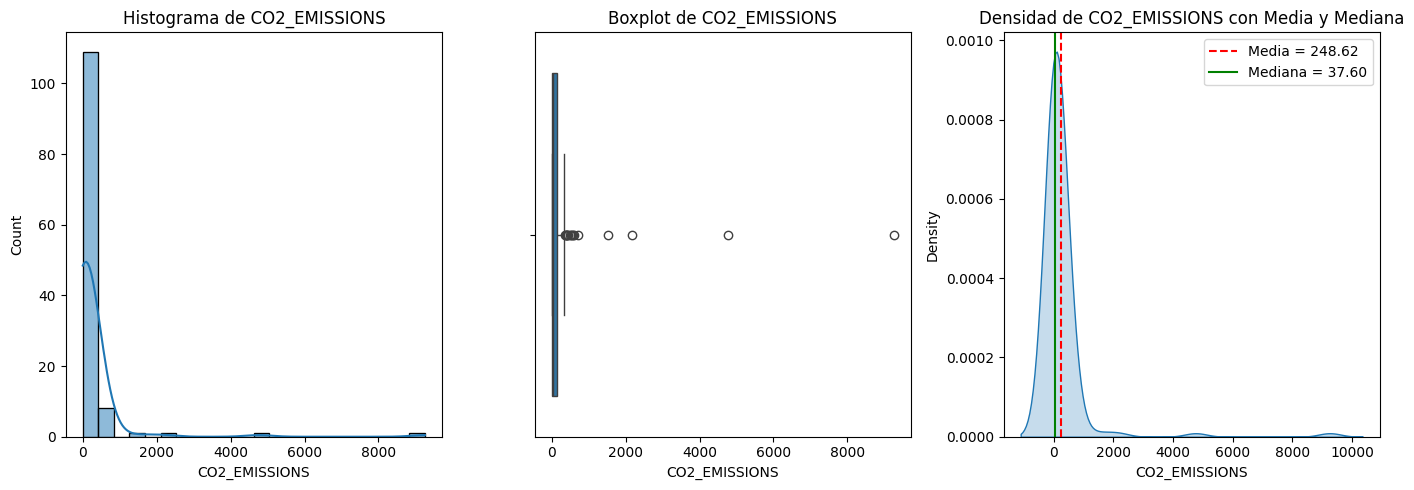

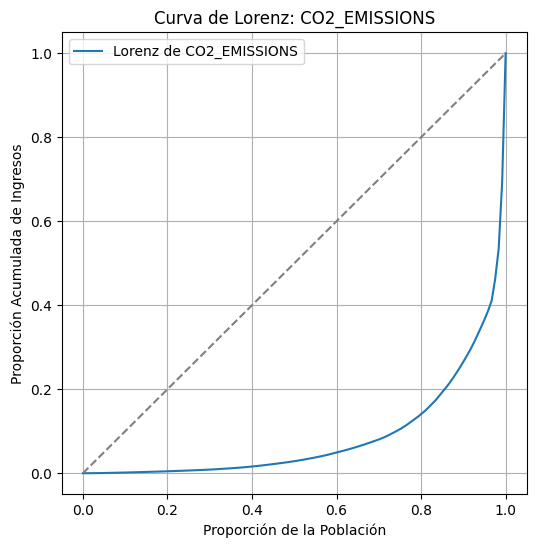

In [12]:
univariate_analysis(data_clean, 'CO2_EMISSIONS')

In [ ]:
for region, group in data_clean.groupby('REGION'):
    print(f"\n{'='*60}")
    print(f"ANÁLISIS PARA LA REGIÓN: {region}")
    print(f"{'='*60}")
    univariate_analysis(group, 'TOURISTS')


Análisis Univariado para SECONDARY_SCHOOL_ENROLLMENT_MALE
--------------------------------------------------
Media: 92.74
Mediana: 96.90
Desviación estándar: 25.69
Varianza: 659.84
Rango: 131.30
Coeficiente de variación: 27.70%
Rango intercuartil (IQR): 27.70
Cuartiles: [ 78.8  96.9 106.5]
Deciles: [ 59.6  73.3  83.7  91.1  96.9 100.7 103.5 110.6 118.9]
Percentiles: [ 30.16  36.32  39.98  43.62  45.9   48.62  50.3   53.18  53.9   59.6
  60.2   61.56  61.8   62.04  64.6   64.8   66.2   67.28  71.    73.3
  73.94  75.02  76.76  77.32  78.8   81.14  81.7   81.88  82.4   83.7
  85.14  87.06  87.48  87.76  87.9   88.3   88.38  88.98  90.26  91.1
  92.52  93.36  94.2   94.56  94.9   95.02  95.14  95.2   95.68  96.9
  97.24  97.8   97.92  98.96  99.3   99.62 100.22 100.4  100.56 100.7
 101.16 101.48 101.6  102.32 102.5  102.7  103.1  103.28 103.48 103.5
 104.3  104.7  104.76 105.2  106.5  106.7  107.74 108.22 109.1  110.6
 111.02 111.18 111.54 112.5  113.   113.38 114.14 115.4  117.72 118.9


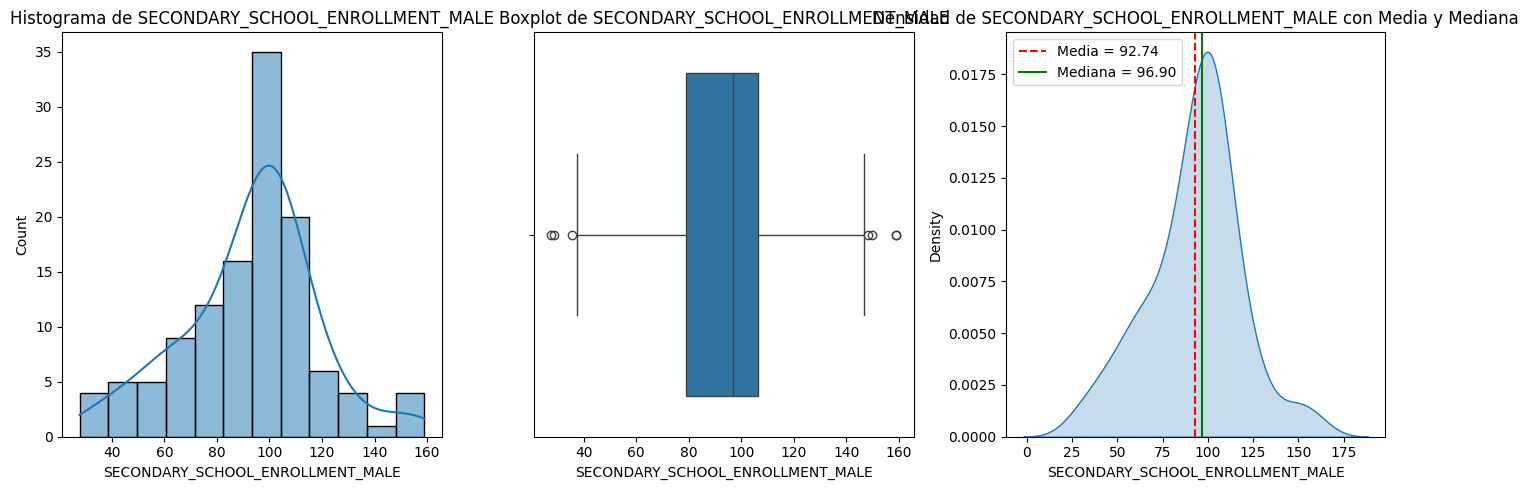

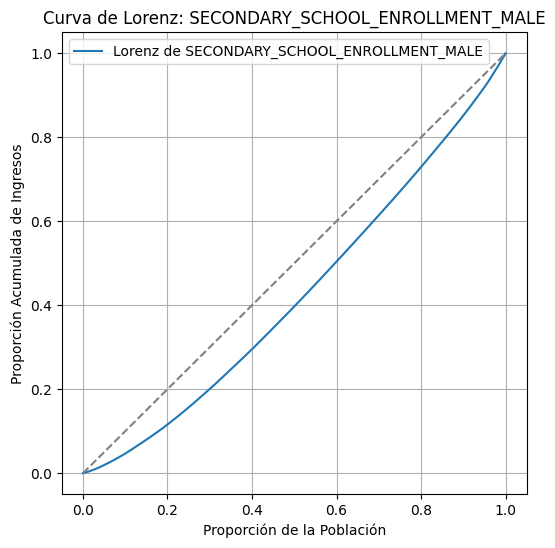

In [15]:
univariate_analysis(data_clean, 'SECONDARY_SCHOOL_ENROLLMENT_MALE')


Análisis Categórico para REGION
--------------------------------------------------
                    Frecuencia Absoluta  Frecuencia Relativa  \
REGION                                                         
Western Asia                         15             0.123967   
Southern Europe                      12             0.099174   
South America                        10             0.082645   
Eastern Europe                       10             0.082645   
Western Europe                        9             0.074380   
Northern Europe                       9             0.074380   
South-Eastern Asia                    8             0.066116   
Southern Asia                         6             0.049587   
Central America                       6             0.049587   
Central Asia                          5             0.041322   
Northern Africa                       5             0.041322   
Western Africa                        5             0.041322   
Eastern Africa      

C:\Users\xioma\AppData\Local\Temp\ipykernel_18240\1502565827.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette="Blues_d")


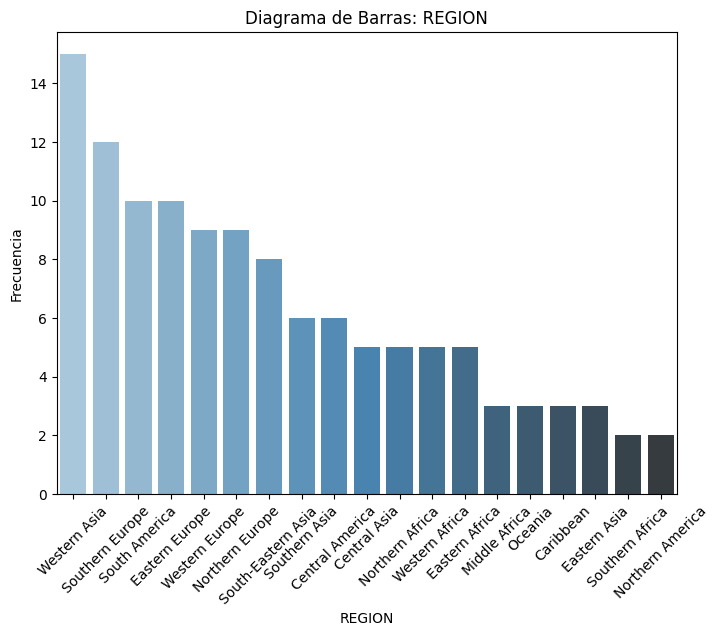

In [28]:
# Análisis categórico para WORK_YEAR
categorical_analysis(data_clean, 'REGION')





ANÁLISIS PARA LA REGIÓN: South America

Análisis Univariado para FERTILITY
--------------------------------------------------
Media: 2.11
Mediana: 2.30
Desviación estándar: 0.31
Varianza: 0.09
Rango: 0.80
Coeficiente de variación: 14.56%
Rango intercuartil (IQR): 0.45
Cuartiles: [1.85 2.3  2.3 ]
Deciles: [1.69 1.78 1.94 2.18 2.3  2.3  2.3  2.32 2.4 ]
Percentiles: [1.609 1.618 1.627 1.636 1.645 1.654 1.663 1.672 1.681 1.69  1.699 1.708
 1.717 1.726 1.735 1.744 1.753 1.762 1.771 1.78  1.789 1.798 1.814 1.832
 1.85  1.868 1.886 1.904 1.922 1.94  1.958 1.976 1.994 2.018 2.045 2.072
 2.099 2.126 2.153 2.18  2.207 2.234 2.261 2.288 2.3   2.3   2.3   2.3
 2.3   2.3   2.3   2.3   2.3   2.3   2.3   2.3   2.3   2.3   2.3   2.3
 2.3   2.3   2.3   2.3   2.3   2.3   2.3   2.3   2.3   2.3   2.3   2.3
 2.3   2.3   2.3   2.3   2.3   2.302 2.311 2.32  2.329 2.338 2.347 2.356
 2.365 2.374 2.383 2.392 2.4   2.4   2.4   2.4   2.4   2.4   2.4   2.4
 2.4   2.4   2.4  ]
Asimetría (Skewness): -0.63
Curtosis:

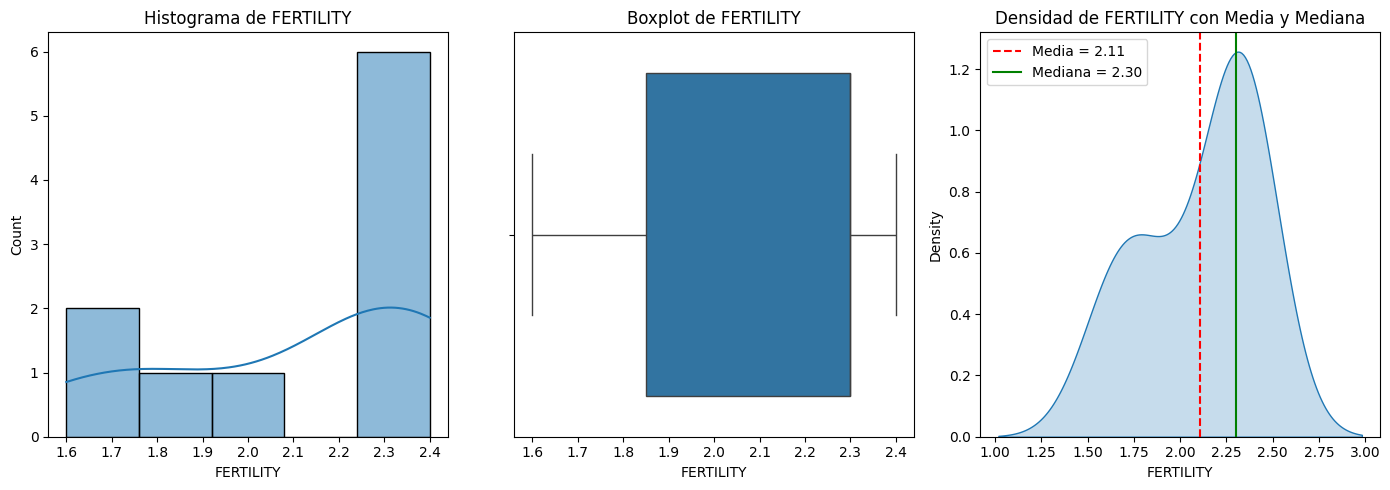

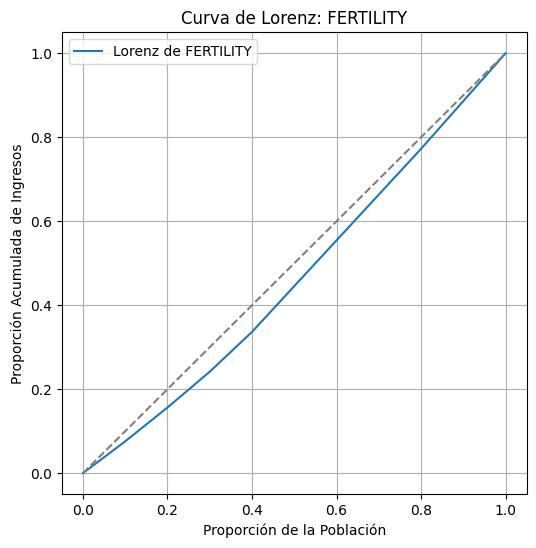


ANÁLISIS PARA LA REGIÓN: Southern Europe

Análisis Univariado para FERTILITY
--------------------------------------------------
Media: 1.47
Mediana: 1.45
Desviación estándar: 0.16
Varianza: 0.03
Rango: 0.50
Coeficiente de variación: 11.01%
Rango intercuartil (IQR): 0.30
Cuartiles: [1.3  1.45 1.6 ]
Deciles: [1.3  1.3  1.33 1.4  1.45 1.5  1.57 1.6  1.6 ]
Percentiles: [1.3   1.3   1.3   1.3   1.3   1.3   1.3   1.3   1.3   1.3   1.3   1.3
 1.3   1.3   1.3   1.3   1.3   1.3   1.3   1.3   1.3   1.3   1.3   1.3
 1.3   1.3   1.3   1.308 1.319 1.33  1.341 1.352 1.363 1.374 1.385 1.396
 1.4   1.4   1.4   1.4   1.4   1.4   1.4   1.4   1.4   1.406 1.417 1.428
 1.439 1.45  1.461 1.472 1.483 1.494 1.5   1.5   1.5   1.5   1.5   1.5
 1.5   1.5   1.5   1.504 1.515 1.526 1.537 1.548 1.559 1.57  1.581 1.592
 1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6
 1.6   1.6   1.6   1.6   1.6   1.6   1.602 1.624 1.646 1.668 1.69  1.712
 1.734 1.756 1.778]
Asimetría (Skewness): 0.57
Curtosis

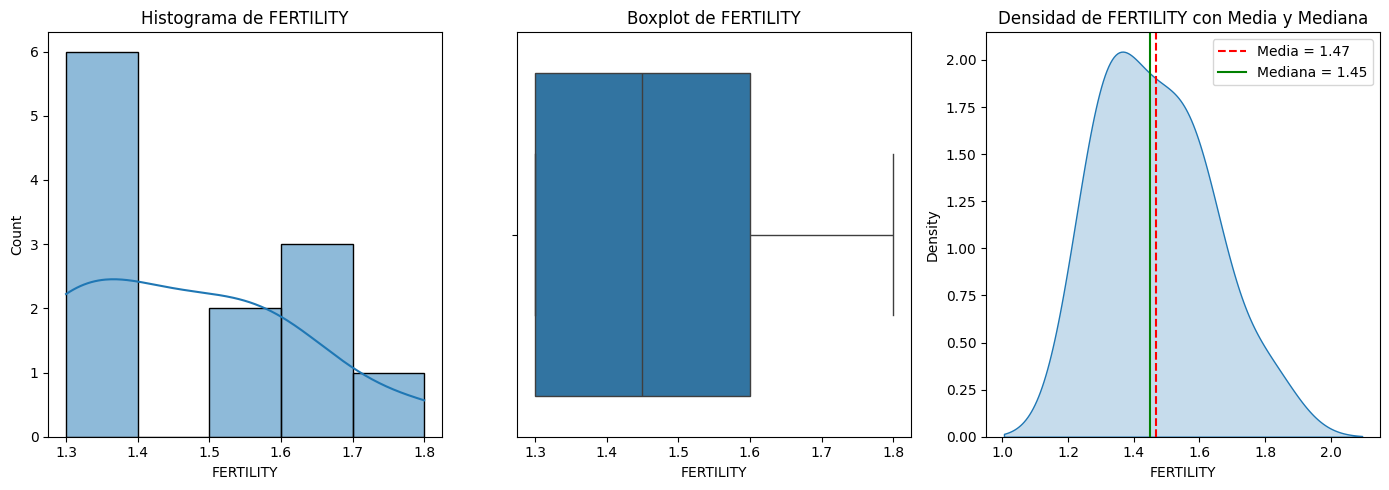

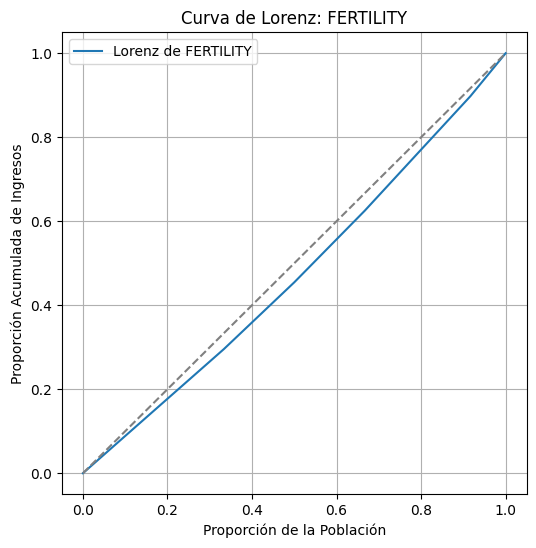

In [ ]:
# Filtrar solo las regiones deseadas
regiones_objetivo = ['Southern Europe', 'South America']
data_filtrada = data_clean[data_clean['REGION'].isin(regiones_objetivo)]

# Agrupar por REGION y aplicar univariate_analysis para cada una
for region, group in data_filtrada.groupby('REGION'):
    print(f"\n{'='*60}")
    print(f"ANÁLISIS PARA LA REGIÓN: {region}")
    print(f"{'='*60}")
    univariate_analysis(group, '')